In [1]:
import numpy as np
import pandas as pd
from itertools import combinations_with_replacement
from scipy.stats import chi2
import scipy.stats as stats
ds = [206,99,103,105,104,489,108]

In [2]:
df = pd.read_excel('df.xlsx')

# Filter to just KHV rows
khv = df[df['Ethnic'] == 'KHV206g'] 

# Filter to just CYP2B6 rows
cyp4f2 = khv[khv['Gene'] == 'CYP4F2']

# Get unique CYP2B6 alleles 
cyp4f2_alleles = set(cyp4f2['Star Allele 1'].unique()) | set(cyp4f2['Star Allele 2'].unique())

print(cyp4f2_alleles)

{1, 2, 3}


In [3]:
cyp4f2_alleles = list(cyp4f2_alleles)
cyp4f2_alleles = [x for x in cyp4f2_alleles if str(x) != 'nan']

print(cyp4f2_alleles)


cyp4f2table = pd.DataFrame(cyp4f2_alleles, columns=['CYP4F2'])
cyp4f2table['KHV'] = 0.0
print(cyp4f2table)

[1, 2, 3]
   CYP4F2  KHV
0       1  0.0
1       2  0.0
2       3  0.0


In [4]:
khv_cyp4f2 = df.query("Ethnic == 'KHV206g' & Gene == 'CYP4F2'")

print(khv_cyp4f2)
start = 0
for allele in cyp4f2_alleles:
  res = 0
  for index, row in khv_cyp4f2.iterrows():
    if allele == row['Star Allele 1']:
      res += row['Percentage per allele']
    if allele == row['Star Allele 2']:  
      res += row['Percentage per allele']
  cyp4f2table.at[start,'KHV'] = res
  start += 1


to_drop = cyp4f2table[cyp4f2table['KHV'] < 1]

# Drop those rows by index
cyp4f2table.drop(index=to_drop.index, inplace=True)
# Divide by 100  
print(cyp4f2table)

      Ethnic            Alleles  Percentage    Gene  Star Allele 1  \
447  KHV206g  CYP4F2*1/CYP4F2*1      62.140  CYP4F2              1   
448  KHV206g  CYP4F2*1/CYP4F2*2       9.223  CYP4F2              1   
449  KHV206g  CYP4F2*1/CYP4F2*3      20.870  CYP4F2              1   
450  KHV206g  CYP4F2*2/CYP4F2*3       2.427  CYP4F2              2   
451  KHV206g  CYP4F2*3/CYP4F2*3       3.398  CYP4F2              3   

     Star Allele 2  Percentage per allele  
447              1                31.0700  
448              2                 4.6115  
449              3                10.4350  
450              3                 1.2135  
451              3                 1.6990  
   CYP4F2      KHV
0       1  77.1865
1       2   5.8250
2       3  15.0465


In [5]:
temp = cyp4f2table['CYP4F2'].values.tolist()

ethnics = df['Ethnic'].unique()
ethnics =np.delete(ethnics, -1)
value_to_delete = 'KHV'
idx = np.where(ethnics == value_to_delete)[0][0]
ethnics = np.delete(ethnics, idx)
print(ethnics)


cyp4f2_rows = df[df['Gene'] == 'CYP4F2']

# Create bool series to check if allele in temp
allele1_matches = cyp4f2_rows['Star Allele 1'].isin(temp)
allele2_matches = cyp4f2_rows['Star Allele 2'].isin(temp)

# Filter for rows where either allele matches 
mask = allele1_matches | allele2_matches
cyp4f2_population = cyp4f2_rows[mask]
cyp4f2_population = cyp4f2_population[cyp4f2_population['Ethnic'] != 'KHV206g']

print(cyp4f2_population)#print(temp)

['CEU' 'CHB' 'CHS' 'JPT' 'SAS' 'YRI']
    Ethnic            Alleles  Percentage    Gene  Star Allele 1  \
356    CEU  CYP4F2*1/CYP4F2*1     58.5900  CYP4F2              1   
357    CEU  CYP4F2*1/CYP4F2*2     19.1900  CYP4F2              1   
358    CEU  CYP4F2*1/CYP4F2*3     14.1400  CYP4F2              1   
359    CEU  CYP4F2*2/CYP4F2*2      2.0200  CYP4F2              2   
360    CEU  CYP4F2*2/CYP4F2*3      5.0510  CYP4F2              2   
361    CEU  CYP4F2*3/CYP4F2*3      1.0100  CYP4F2              3   
362    CHB  CYP4F2*1/CYP4F2*1     60.1900  CYP4F2              1   
363    CHB  CYP4F2*1/CYP4F2*2     13.5900  CYP4F2              1   
364    CHB  CYP4F2*1/CYP4F2*3     22.3300  CYP4F2              1   
365    CHB  CYP4F2*2/CYP4F2*3      2.9130  CYP4F2              2   
366    CHB  CYP4F2*3/CYP4F2*3      0.9709  CYP4F2              3   
367    CHS  CYP4F2*1/CYP4F2*1     62.8600  CYP4F2              1   
368    CHS  CYP4F2*1/CYP4F2*2     11.4300  CYP4F2              1   
369    CHS

In [6]:
for ethnic in ethnics:
        cyp4f2table[ethnic] = 0.0

cyp4f2table = cyp4f2table.reset_index(drop=True)

print(cyp4f2table)

   CYP4F2      KHV  CEU  CHB  CHS  JPT  SAS  YRI
0       1  77.1865  0.0  0.0  0.0  0.0  0.0  0.0
1       2   5.8250  0.0  0.0  0.0  0.0  0.0  0.0
2       3  15.0465  0.0  0.0  0.0  0.0  0.0  0.0


In [7]:
start = 0
for ethnic in ethnics:
    start = 0
    for starallele in temp:
        res = 0

        for index, row in cyp4f2_population.iterrows():
            if row['Ethnic'] == ethnic:
                if starallele == row['Star Allele 1']:
                    res += row['Percentage per allele']
                if starallele == row['Star Allele 2']:  
                    res += row['Percentage per allele']
                cyp4f2table.at[start,ethnic] = res
        #print(start)    
        start += 1
    cyp4f2table[ethnic] = cyp4f2table[ethnic].round(1)

cyp4f2table['KHV'] = cyp4f2table['KHV'].round(1)
cyp4f2table.to_csv('frq/cyp4f2.csv')
print(cyp4f2table)

   CYP4F2   KHV   CEU   CHB   CHS   JPT   SAS   YRI
0       1  77.2  75.3  78.2  80.0  76.9  58.1  54.6
1       2   5.8  14.1   8.3   6.7   5.8  14.1   3.2
2       3  15.0  10.6  13.6  13.3  17.3  27.0   1.4


In [8]:
init = {'CEU': [0], 'CHB': [0], 'CHS': [0], 'JPT': [0], 'SAS': [0], 'YRI': [0]}
gst = pd.DataFrame(init, dtype=float)

h_s_k = 1.0
for index,value in cyp4f2table.iterrows():
    h_s_k -= (cyp4f2table.at[index,'KHV']/100) * (cyp4f2table.at[index,'KHV']/100)

for idx in range(0,6):
    value = 0
    h_t = 1.0
    h_s = 1.0
    for id in range(0,3):
        h_t -= ((cyp4f2table.iloc[id,idx + 2] + cyp4f2table.iloc[id,1])/200) * ((cyp4f2table.iloc[id,idx + 2] + cyp4f2table.iloc[id,1])/200)
        h_s -= (cyp4f2table.iloc[id,idx + 2]/100) * (cyp4f2table.iloc[id,idx + 2]/100)
    h_s = (h_s + h_s_k)/2
    gst.iloc[0,idx] = (h_t - h_s)/h_t # You can modify the value here'''
gst = gst.round(4)
gst.index = ['CYP4F2']
gst.to_csv('gst/gst_cyp4f2.csv')
print(gst)

           CEU     CHB     CHS     JPT     SAS     YRI
CYP4F2  0.0059  0.0006  0.0008  0.0004  0.0296  0.0315


In [9]:
test = list(cyp4f2table['CYP4F2'])
test = ['CYP4F2*' + str(int(item)) for item in test]

def generate_gene_combinations(alleles):
    combinations = list(combinations_with_replacement(alleles, 2))
    sorted_combinations = ["/".join(sorted(comb)) for comb in combinations]
    return sorted_combinations

gene_combinations = generate_gene_combinations(test)
degrees_of_freedom = len(gene_combinations) - 1
print(gene_combinations)


['CYP4F2*1/CYP4F2*1', 'CYP4F2*1/CYP4F2*2', 'CYP4F2*1/CYP4F2*3', 'CYP4F2*2/CYP4F2*2', 'CYP4F2*2/CYP4F2*3', 'CYP4F2*3/CYP4F2*3']


In [10]:
observed = pd.DataFrame(gene_combinations, columns=['Gene'])
new_columns = ['KHV', 'CEU', 'CHB', 'CHS', 'JPT', 'SAS', 'YRI']
for column in new_columns:
    observed[column] = 0.0

print(observed)

                Gene  KHV  CEU  CHB  CHS  JPT  SAS  YRI
0  CYP4F2*1/CYP4F2*1  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  CYP4F2*1/CYP4F2*2  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  CYP4F2*1/CYP4F2*3  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  CYP4F2*2/CYP4F2*2  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  CYP4F2*2/CYP4F2*3  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5  CYP4F2*3/CYP4F2*3  0.0  0.0  0.0  0.0  0.0  0.0  0.0


In [11]:
l = len(khv_cyp4f2)
for x in range(0,l):
    if khv_cyp4f2.iloc[x,1] in gene_combinations:
        gene_to_update = khv_cyp4f2.iloc[x,1]
        new_value = khv_cyp4f2.iloc[x,2]
        observed.loc[observed['Gene'] == gene_to_update, 'KHV'] = new_value

length = len(cyp4f2_population)
for x in range(0,length):
    if cyp4f2_population.iloc[x,1] in gene_combinations:
        gene_to_update = cyp4f2_population.iloc[x,1]
        pop_to_update = cyp4f2_population.iloc[x,0]
        new_value = cyp4f2_population.iloc[x,2]
        observed.loc[observed['Gene'] == gene_to_update, pop_to_update ] = new_value 

for x in range(0,7):
    for y in range(0,len(gene_combinations)):
        observed.iloc[y,x+1] = observed.iloc[y,x+1] * ((ds[x] * 1.0)/ 100)

print(observed)

                Gene        KHV       CEU        CHB       CHS       JPT  \
0  CYP4F2*1/CYP4F2*1  129.01780  58.00410  61.995700  66.00300  65.99840   
1  CYP4F2*1/CYP4F2*2   12.48566  18.99810  13.997700  12.00150   5.00032   
2  CYP4F2*1/CYP4F2*3   49.93440  13.99860  22.999900  24.00300  23.00480   
3  CYP4F2*2/CYP4F2*2    0.00000   1.99980   0.000000   0.00000   1.99992   
4  CYP4F2*2/CYP4F2*3    2.08060   5.00049   3.000390   2.00025   3.00040   
5  CYP4F2*3/CYP4F2*3   12.48566   0.99990   1.000027   1.00002   5.00032   

         SAS        YRI  
0  171.98130  55.004400  
1   80.97840   6.000480  
2  142.98360   2.000160  
3   10.99761   0.000000  
4   34.99773   0.999972  
5   42.99777   0.000000  


In [12]:
hypo = pd.DataFrame(gene_combinations, columns=['Gene'])
for column in new_columns:
    hypo[column] = 0.0

allele = cyp4f2table.iloc[:,0].tolist()

for x in range(0,7):
    temp = cyp4f2table.iloc[:,x + 1].tolist()
    for allele1 in range(0,len(temp)):
        for allele2 in range(allele1,len(temp)):
            if allele1 == allele2:
                new_value = (temp[allele1] / 100) * (temp[allele2] / 100)
            elif allele1 != allele2:
                new_value = 2 * (temp[allele1] / 100) * (temp[allele2] / 100)
            gene = f"CYP4F2*{int(allele[allele1])}/CYP4F2*{int(allele[allele2])}"
            row_index = hypo.index[hypo['Gene'] == gene].tolist()[0]
            hypo.iloc[row_index, x+1] = new_value 

print(hypo)

                Gene       KHV       CEU       CHB       CHS       JPT  \
0  CYP4F2*1/CYP4F2*1  0.595984  0.567009  0.611524  0.640000  0.591361   
1  CYP4F2*1/CYP4F2*2  0.089552  0.212346  0.129812  0.107200  0.089204   
2  CYP4F2*1/CYP4F2*3  0.231600  0.159636  0.212704  0.212800  0.266074   
3  CYP4F2*2/CYP4F2*2  0.003364  0.019881  0.006889  0.004489  0.003364   
4  CYP4F2*2/CYP4F2*3  0.017400  0.029892  0.022576  0.017822  0.020068   
5  CYP4F2*3/CYP4F2*3  0.022500  0.011236  0.018496  0.017689  0.029929   

        SAS       YRI  
0  0.337561  0.298116  
1  0.163842  0.034944  
2  0.313740  0.015288  
3  0.019881  0.001024  
4  0.076140  0.000896  
5  0.072900  0.000196  


In [13]:
print(cyp4f2table)
def f(row):
    return "CYP4F2*" + str(row)
cyp4f2table["CYP4F2"] = cyp4f2table["CYP4F2"].apply(f)
cyp4f2table.rename(columns={"CYP4F2": "Gene"}, inplace=True)
cyp4f2table.to_excel("heatmap/cyp4f2table.xlsx")

   CYP4F2   KHV   CEU   CHB   CHS   JPT   SAS   YRI
0       1  77.2  75.3  78.2  80.0  76.9  58.1  54.6
1       2   5.8  14.1   8.3   6.7   5.8  14.1   3.2
2       3  15.0  10.6  13.6  13.3  17.3  27.0   1.4


        0     1     2
KHV  77.2   5.8  15.0
CEU  75.3  14.1  10.6
CHB  78.2   8.3  13.6
CHS  80.0   6.7  13.3
JPT  76.9   5.8  17.3
SAS  58.1  14.1  27.0
YRI  54.6   3.2   1.4
[[ 0.59068008 -0.63181311  0.13701827]
 [ 0.39476873  1.4778617  -0.48359388]
 [ 0.69379132  0.00363111 -0.06044924]
 [ 0.87939154 -0.40305319 -0.1027637 ]
 [ 0.55974671 -0.63181311  0.46142916]
 [-1.37874453  1.4778617   1.82959686]
 [-1.73963386 -1.2926751  -1.78123747]]
Explained Variance for PC1: 0.52
Explained Variance for PC2: 0.34


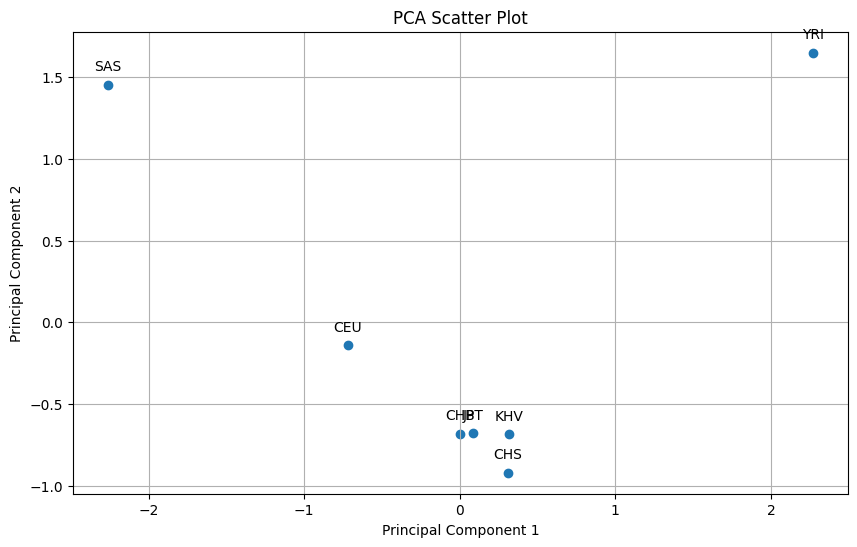

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cyp4f2table_copy = cyp4f2table
cols = cyp4f2table_copy.iloc[:,0].tolist()
cyp4f2table_copy = cyp4f2table_copy.transpose()
cyp4f2table_copy.drop(index=cyp4f2table_copy.index[0], axis=0, inplace=True)
print(cyp4f2table_copy)

df = cyp4f2table_copy

index = list(df.index)

# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print(scaled_data)
# Perform PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a scatter plot with labels
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance for PC{i + 1}: {ratio:.2f}")

# Add labels for each point
for label, x, y in zip(index, principal_components[:, 0], principal_components[:, 1]):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha="center")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Scatter Plot")
plt.grid()
plt.show()